# Data Analysis based on the results of the PISA 2012

### A little summary about PISA 2012 dataset

PISA is a unique global survey that examines how well prepared 15 year old students are for life after they have completed school. PISA’s goal is to assess students’ preparation for the challenges of life as young adults. PISA assesses the application of knowledge in mathematics, science, and reading literacy to problems within a reallife context (OECD 1999).

## Part 2: Analysis and Visualization

#### For my analysis, I wanted to focus on few of the below mentioned things:
- ___Initially, We are keen on discovering how understudies from individual nations perform in Math, Reading and Science proficiency.___

    * _For that, we will check the normal world and nation wide distribution of Math, Reading and Science education scores, independently._


- ___Furthermore, we wanted to take a look at just the top percentile of students and see how gender is distributed.___

    * _For that, we will break down the gender of the student with respect to the subjects Math, Reading and Science Score._


- ___Thirdly, we need to know which gender perform better a role in student's performance country shrewd in Math, Reading and Science education.___
    * _For that, we will investigate the gender of the student dependent on the country they belong with respect to the subjects Math, Reading and Science Score.__


- ___We would like to know which gender is performing better in Math, Reading and Science education.___
    * _For that, we will investigate the percentage difference among the genders of the student based upon the country they belong with respect to the subjects Math, Reading and Science Score.__


- ___We likewise need to realize whether parents from the same cultural background(those from a same country) has any influence in student's presentation country wise in Math, Reading and Science proficiency.___ 
    * _For that, we will analyze the parents from Same Cultural Background dependent upon the country they belong to with respect to the subjects Math, Reading and Science Score._


- ___We needed to know whether possession has any influence in student's performance country wise in Math, Reading and Science education.___
    * _For that, we will break down the parents from Same Cultural Background dependent upon the country they belong to with respect to the subjects Math, Reading and Science Score._

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# for any warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_student= pd.read_pickle('pisa_2012_clean.pkl')
df_student.info()
df_student.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 10 columns):
Country                               485490 non-null object
Age                                   485490 non-null float64
Gender                                485490 non-null object
Job_Status_Mother                     485490 non-null object
Job_Status_Father                     485490 non-null object
Maths Score                           485490 non-null float64
Reading Score                         485490 non-null float64
Science Score                         485490 non-null float64
Possessions                           485490 non-null int64
Parents - Same Cultural Background    485490 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 40.7+ MB


,Country,Age,Gender,Job_Status_Mother,Job_Status_Father,Maths Score,Reading Score,Science Score,Possessions,Parents - Same Cultural Background
1,Albania,16.17,Female,Other,Part-time,366.18634,261.01424,371.91348,3,Same
2,Albania,16.17,Female,Full-time,Full-time,470.56396,384.68832,478.12382,10,Same
3,Albania,15.58,Female,Full-time,Full-time,505.53824,405.18154,486.60946,8,Same
4,Albania,15.67,Female,Full-time,Full-time,449.45476,477.46376,453.97240,9,Same
5,Albania,15.50,Female,Part-time,Part-time,385.50398,256.01010,367.15778,8,Same


### Percentage of Students based upon Gender

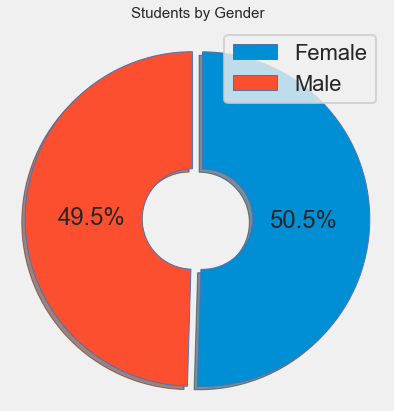

In [3]:
plt.style.use('fivethirtyeight')
sns.set_context("poster")
plt.figure(figsize=[10,6])

plt.pie(df_student['Gender'].value_counts(), startangle=90, counterclock=False, 
        shadow=True, explode=(0, 0.06), autopct='%1.1f%%', 
        wedgeprops = dict(width = 0.7, edgecolor= 'b', linewidth = 1, antialiased = True))
plt.axis('square')
plt.tight_layout()
plt.legend(['Female', 'Male'],  loc="best")
plt.title('Students by Gender', size=15);

In [4]:
print('Male Students: {:.4f}%'.format(df_student['Gender'].value_counts()['Male']/df_student.shape[0]))
print('Female Students: {:.4f}%'.format(df_student['Gender'].value_counts()['Female']/df_student.shape[0]))

Male Students: 0.4952%
Female Students: 0.5048%


**Gender is almost evenly split.**

### Distribution of Students for each subject

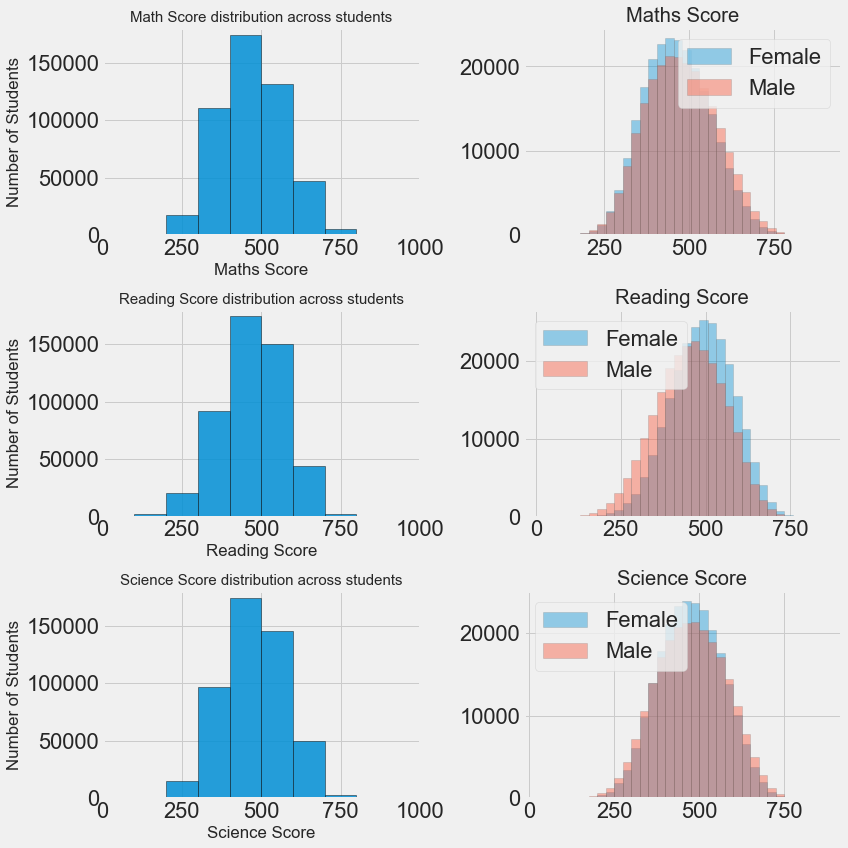

In [5]:
#Overall Score
plt.style.use('fivethirtyeight')
#sns.set_context("poster")
plt.figure(figsize=[12,12])

plt.subplot(3, 2, 1)
binsize=100
bins=np.arange(0,df_student['Maths Score'].max()+binsize,binsize)

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.hist(x = df_student['Maths Score'], bins=bins, ec = 'black', alpha = 0.85)
plt.title('Math Score distribution across students', size=15)
plt.xlabel('Maths Score')
plt.ylabel('Number of Students');

plt.subplot(3, 2, 2)
binsize=25
bins=np.arange(min(df_student['Maths Score']),max(df_student['Maths Score'])+binsize, binsize)

plt.title('Maths Score')
plt.hist(data=df_student.query('Gender=="Female"'),x='Maths Score', ec = 'dimgrey', alpha=.4,bins=bins,label='Female')
plt.hist(data=df_student.query('Gender=="Male"'),x='Maths Score', ec = 'dimgrey', alpha=.4,bins=bins, label='Male')
plt.legend();

plt.subplot(3, 2, 3)
binsize=100
bins=np.arange(0,df_student['Reading Score'].max()+binsize,binsize)

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.hist(x=df_student['Reading Score'],bins=bins, ec = 'black', alpha = 0.85)
plt.title('Reading Score distribution across students', size=15)
plt.xlabel('Reading Score')
plt.ylabel('Number of Students');

plt.subplot(3, 2, 4)
binsize=25
bins=np.arange(min(df_student['Reading Score']),max(df_student['Reading Score'])+binsize, binsize)

plt.title('Reading Score')
plt.hist(data=df_student.query('Gender=="Female"'),x='Reading Score', ec = 'dimgrey', alpha=.4,bins=bins,label='Female')
plt.hist(data=df_student.query('Gender=="Male"'),x='Reading Score', ec = 'dimgrey', alpha=.4,bins=bins, label='Male')
plt.legend();

plt.subplot(3, 2, 5)
binsize=100
bins=np.arange(0,df_student['Science Score'].max()+binsize,binsize)

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.hist(x=df_student['Science Score'],bins=bins, ec = 'black', alpha = 0.85)
plt.title('Science Score distribution across students', size=15)
plt.xlabel('Science Score')
plt.ylabel('Number of Students');

plt.subplot(3, 2, 6)
binsize=25
bins=np.arange(min(df_student['Science Score']),max(df_student['Science Score'])+binsize, binsize)

plt.title('Science Score')
plt.hist(data=df_student.query('Gender=="Female"'), x = 'Science Score', ec = 'dimgrey', alpha = 0.4, bins = bins, label = 'Female')
plt.hist(data=df_student.query('Gender=="Male"'), x = 'Science Score', ec = 'dimgrey', alpha = 0.4, bins = bins, label = 'Male')
plt.legend();

plt.tight_layout()

plt.savefig('img/hist_score_overall.png', bbox_inches='tight')

From the above distributions, we find out that:

- _The proficiency scores are spread out in a reasonable, clear, smooth unimodal distribution of values_


- _Most of the students are scoring in each subject somewhere in the range of 300 and 600 points, while a little part of the all out number accomplishes poor score (somewhere in the range of 100 and 300) or more noteworthy (somewhere in the range of 600 and 800) test results_


- _For each one of these three score appropriations, most students fitted inside the interim of scores somewhere in the range of 400 and 500 points, which happens to likewise be the center interim of the conceivable score run. This demonstrates the PISA 2012 test has been developed in a proper way._


- _The Males students consistently score better than the Female students for all the considered subjects including Maths and Science except Reading Scores._

### Top percentile of students and Gender distribution

**Maths Score**

In [6]:
df_75 = df_student[df_student['Maths Score']>=df_student['Maths Score'].quantile(.75)]
df_90 = df_student[df_student['Maths Score']>=df_student['Maths Score'].quantile(.90)]
df_95 = df_student[df_student['Maths Score']>=df_student['Maths Score'].quantile(.95)]
df_99 = df_student[df_student['Maths Score']>=df_student['Maths Score'].quantile(.99)]

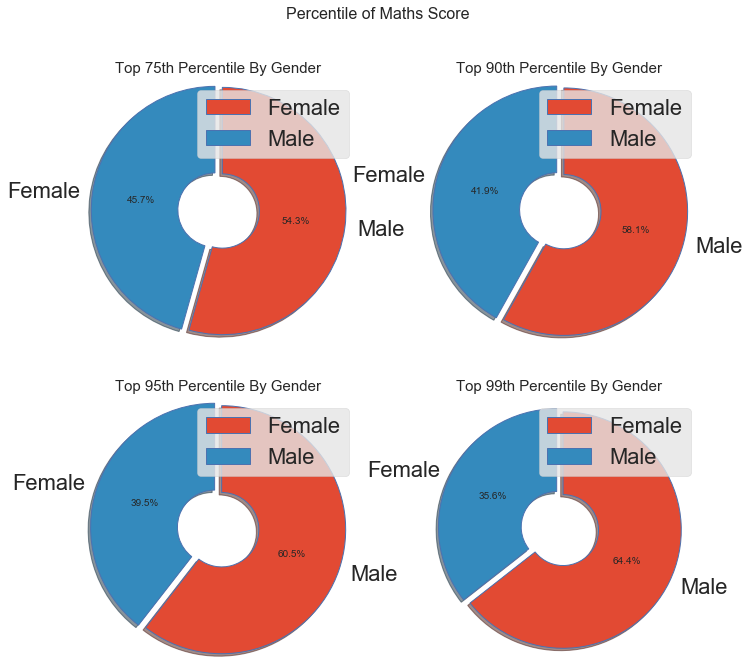

In [7]:
plt.style.use('ggplot')
#sns.set_context("talk")

percent=[75,90,95,99]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax=ax.flatten()

for i in range(4):
    plt.sca(ax[i])
    df=eval('df_'+str(percent[i]))
    plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, shadow=True, explode=(0, 0.06), autopct='%1.1f%%', 
        startangle=90, counterclock=False, wedgeprops = dict(width = 0.7, edgecolor= 'b', linewidth = 1, antialiased = True))
    plt.legend(['Female', 'Male'],  loc="best")
    plt.axis('equal')
    plt.title('Top '+ str(percent[i])+'th Percentile By Gender',size=15)
fig.suptitle('Percentile of Maths Score', fontsize=16)
plt.savefig('img/maths_percentile.png', bbox_inches='tight')

**Reading Score**

In [8]:
df_75 = df_student[df_student['Reading Score']>=df_student['Reading Score'].quantile(.75)]
df_90 = df_student[df_student['Reading Score']>=df_student['Reading Score'].quantile(.90)]
df_95 = df_student[df_student['Reading Score']>=df_student['Reading Score'].quantile(.95)]
df_99 = df_student[df_student['Reading Score']>=df_student['Reading Score'].quantile(.99)]

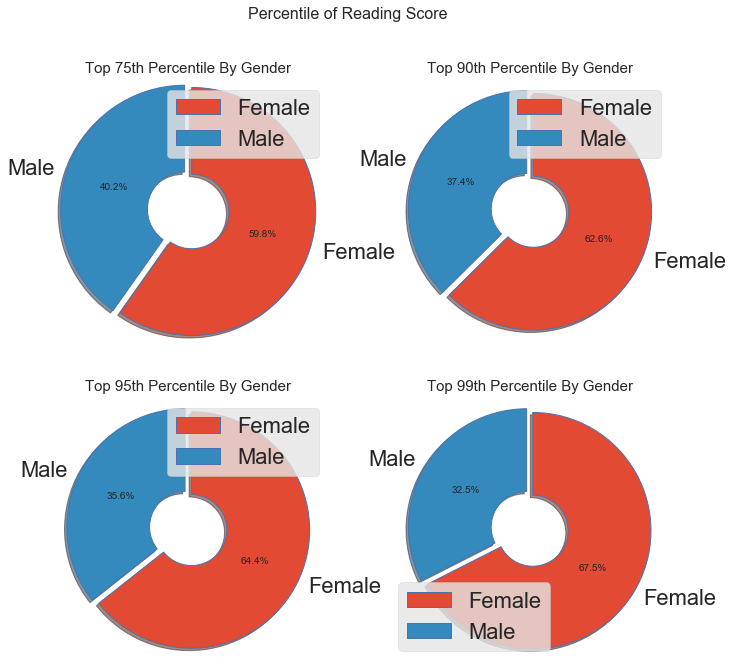

In [9]:
plt.style.use('ggplot')
#sns.set_context("talk")

percent=[75,90,95,99]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax=ax.flatten()

for i in range(4):
    plt.sca(ax[i])
    df=eval('df_'+str(percent[i]))
    plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, shadow=True, explode=(0, 0.06), autopct='%1.1f%%', 
        startangle=90, counterclock=False, wedgeprops = dict(width = 0.7, edgecolor= 'b', linewidth = 1, antialiased = True))
    plt.legend(['Female', 'Male'],  loc="best")
    plt.axis('equal')
    plt.title('Top '+ str(percent[i])+'th Percentile By Gender',size=15)
fig.suptitle('Percentile of Reading Score', fontsize=16)
plt.savefig('img/reading_percentile.png', bbox_inches='tight')

In [10]:
df_75 = df_student[df_student['Science Score']>=df_student['Science Score'].quantile(.75)]
df_90 = df_student[df_student['Science Score']>=df_student['Science Score'].quantile(.90)]
df_95 = df_student[df_student['Science Score']>=df_student['Science Score'].quantile(.95)]
df_99 = df_student[df_student['Science Score']>=df_student['Science Score'].quantile(.99)]

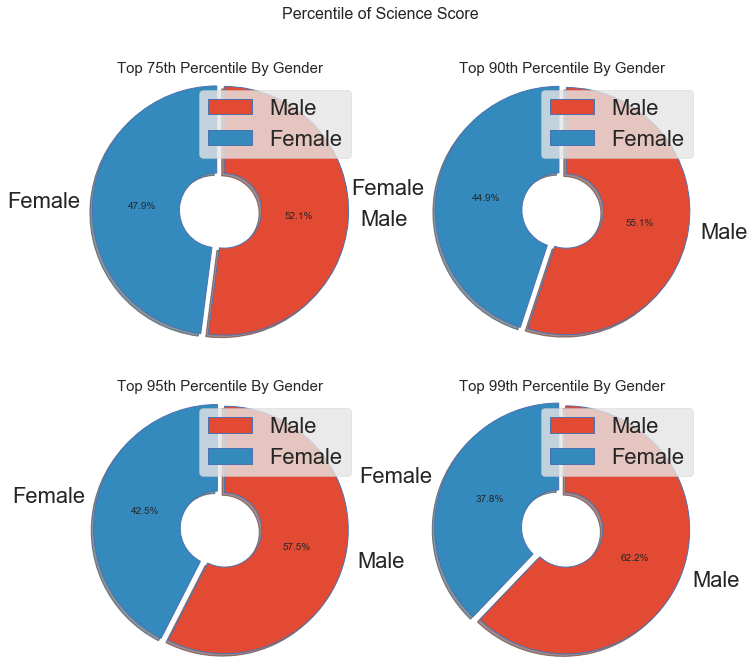

In [11]:
plt.style.use('ggplot')
#sns.set_context("talk")

percent=[75,90,95,99]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax=ax.flatten()

for i in range(4):
    plt.sca(ax[i])
    df=eval('df_'+str(percent[i]))
    plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, shadow=True, explode=(0, 0.06), autopct='%1.1f%%', 
        startangle=90, counterclock=False, wedgeprops = dict(width = 0.7, edgecolor= 'b', linewidth = 1, antialiased = True))
    plt.legend(['Male', 'Female'],  loc="best")
    plt.axis('equal')
    plt.title('Top '+ str(percent[i])+'th Percentile By Gender',size=15)
fig.suptitle('Percentile of Science Score', fontsize=16)
plt.savefig('img/science_percentile.png', bbox_inches='tight')

**This is actually very interesting to see. Notice how as the top nth percentile increases, the gender gap increases as well.**
- Considering first two Percentile of the Subjects by Gender, Maths Score and Reading Score,  we see the same trend as the gender gap increases.
- However, we do nt see the same trend with the Science Score, we see percentile increases but gender gap of male increases rather than female unlike the others.

### Distribution of Students Country-Wise

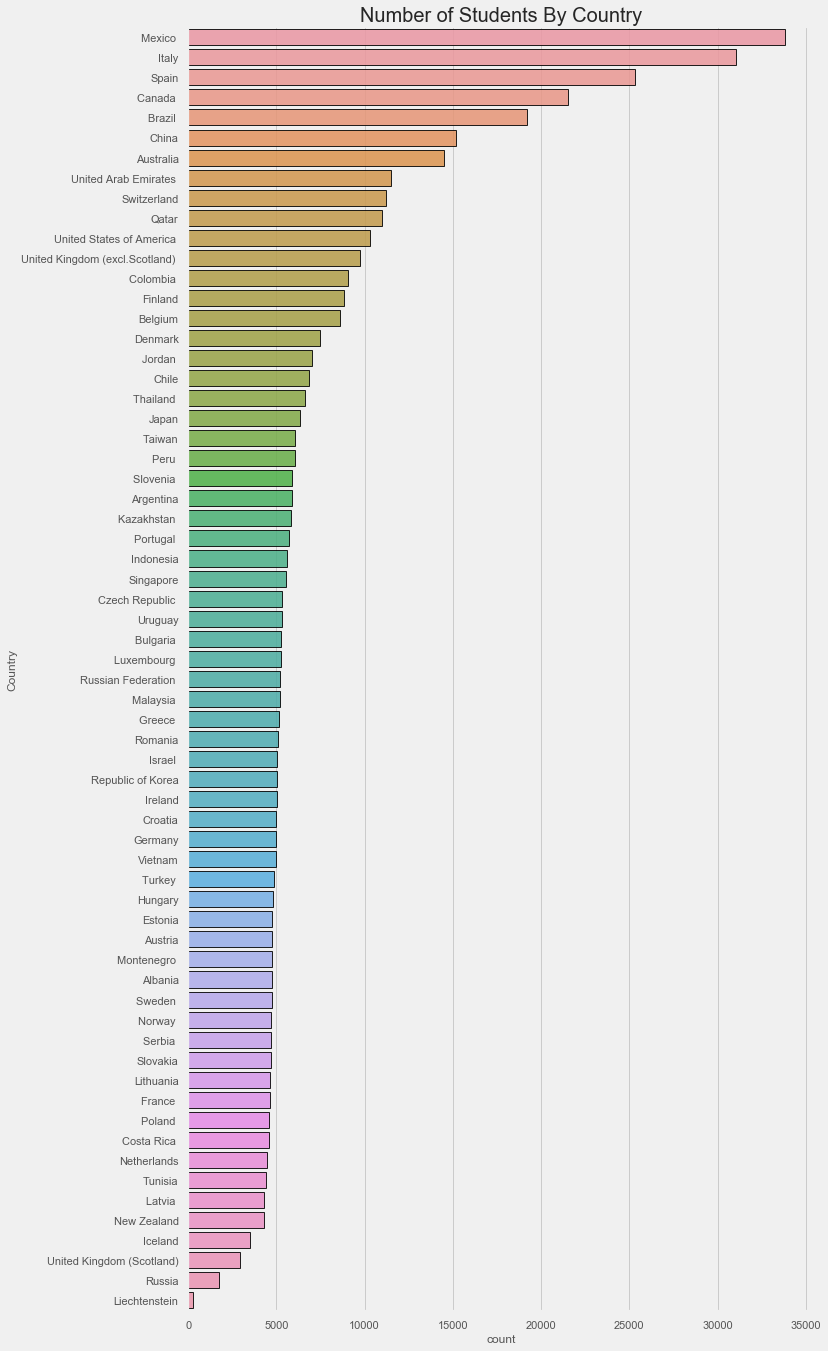

In [12]:
plt.style.use('fivethirtyeight')
sns.set_context("notebook")

order= df_student['Country'].value_counts().index

plt.figure(figsize=[10,22])
sns.countplot(data=df_student,y='Country', order=order, ec = 'black', alpha = 0.85)
plt.title('Number of Students By Country',size=20);
plt.savefig('img/count_student_country.png', bbox_inches='tight')

__From the above observation, we have:-__
- _Most countries have between 5000 to 10000 students taking the survey. The countplot also shows that there are a few countries which are not bounded these limits._
    - For example, Mexico and Italy have over 30,000 students and Liechtenstein has well below 1000 students.

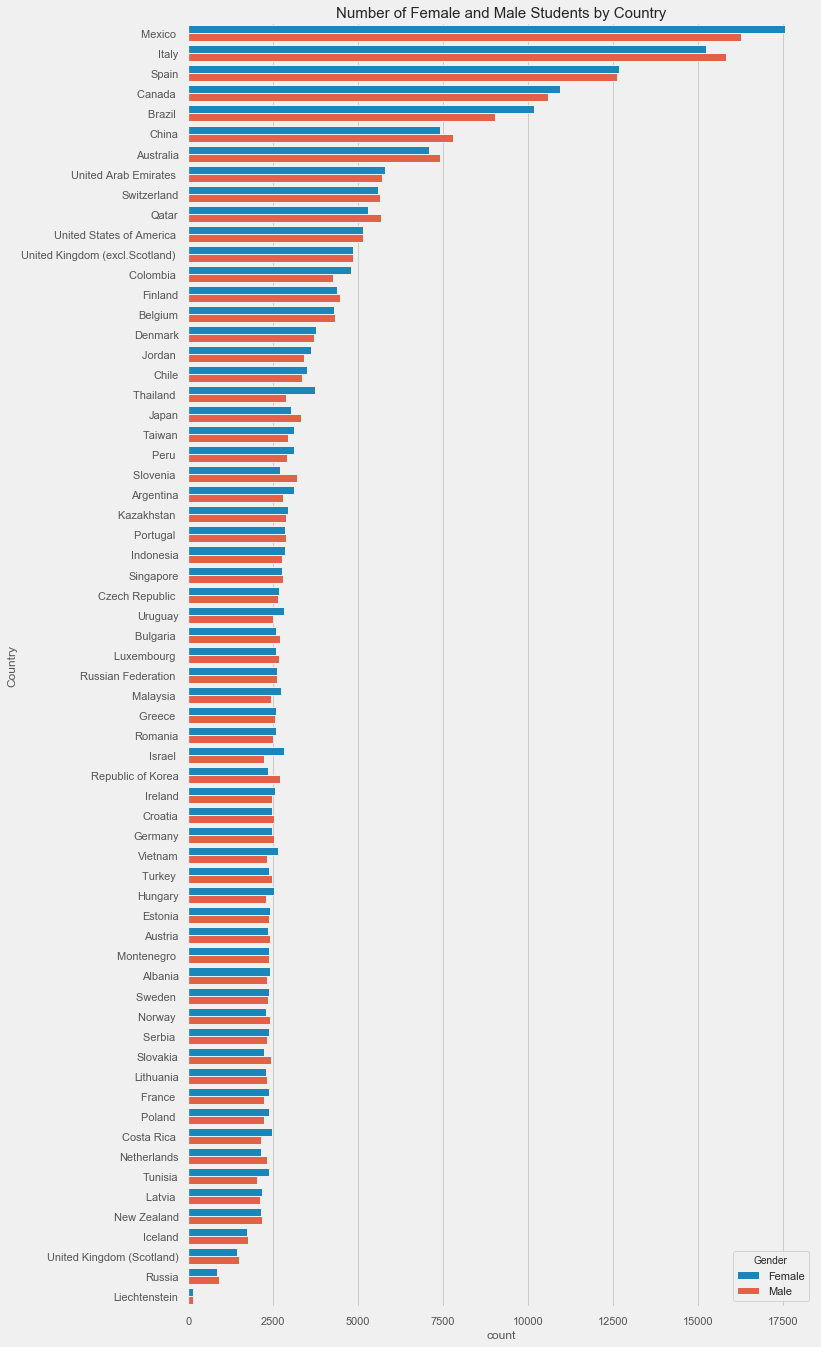

In [13]:
plt.style.use('fivethirtyeight')
sns.set_context("notebook")

order= df_student['Country'].value_counts().index

plt.figure(figsize=[10,22])
sns.countplot(data=df_student, y='Country', order=order, hue='Gender')
plt.title('Number of Female and Male Students by Country',size=15);
plt.savefig('img/count_student_gender_country.png', bbox_inches='tight')

In [14]:
female_student = df_student.query('Gender=="Female"').groupby('Country').size()
male_student = df_student.query('Gender=="Male"').groupby('Country').size()

In [15]:
country=df_student['Country'].unique().tolist()
country.sort()

In [16]:
# we must make sure that the index matches for all
country == female_student.index.tolist()==male_student.index.tolist()

True

In [17]:
df_gender=pd.DataFrame({'country': country, 'female_population': female_student.values,'male_population':male_student.values})
df_gender['total_population']=df_gender['female_population']+df_gender['male_population']
df_gender['female_percent']=100*(df_gender['female_population']/df_gender['total_population'])
df_gender['male_percent']=100*(df_gender['male_population']/df_gender['total_population'])
df_gender['diff_percent']=(np.absolute((df_gender['female_percent']-df_gender['male_percent'])))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


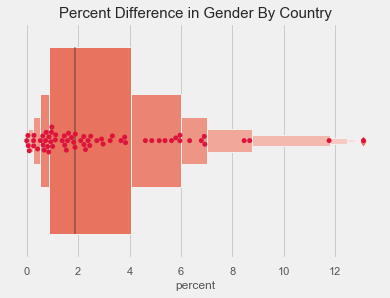

In [18]:
sns.swarmplot(data=df_gender, x='diff_percent', color='crimson')
sns.boxenplot(data=df_gender, x='diff_percent', color ='tomato')
plt.title('Percent Difference in Gender By Country', size = 15)
plt.xlabel('percent');

In [19]:
df_gender.sort_values('diff_percent',ascending=False).head(5)

,country,female_population,male_population,total_population,female_percent,male_percent,diff_percent
55,Thailand,3736,2870,6606,56.554647,43.445353,13.109295
24,Israel,2825,2230,5055,55.885262,44.114738,11.770524
50,Slovenia,2699,3212,5911,45.660633,54.339367,8.678735
56,Tunisia,2390,2017,4407,54.231904,45.768096,8.463808
43,Republic of Korea,2342,2691,5033,46.532883,53.467117,6.934234


___While most countries show an almost 50/50 split between gender, there are some countries like Mexico, Thailand and Israel that show an very uneven split.___
- So, to check the uneven split between gender, we tried to know the gender split in different countries.
- Almost half of the countries have a difference in gender of about 2% and lower for students. It even looks like 2 countries have a difference of more than 10%.
- If we take a look at the top 10 countries with the most gender differences, 8 out of 10 countries are female dominated.

---

### Subject-Wise Distributions By Country

After finding out previously the gender percentile distribution for each literacy category, we are interested to look into the relationship how the country of residence/education affects scores on each of the subjects individually.

In [20]:
math_score_country_order = df_student.groupby('Country')['Maths Score'].mean().sort_values(ascending = False).index
reading_score_country_order = df_student.groupby('Country')['Reading Score'].mean().sort_values(ascending = False).index
science_score_country_order = df_student.groupby('Country')['Science Score'].mean().sort_values(ascending = False).index

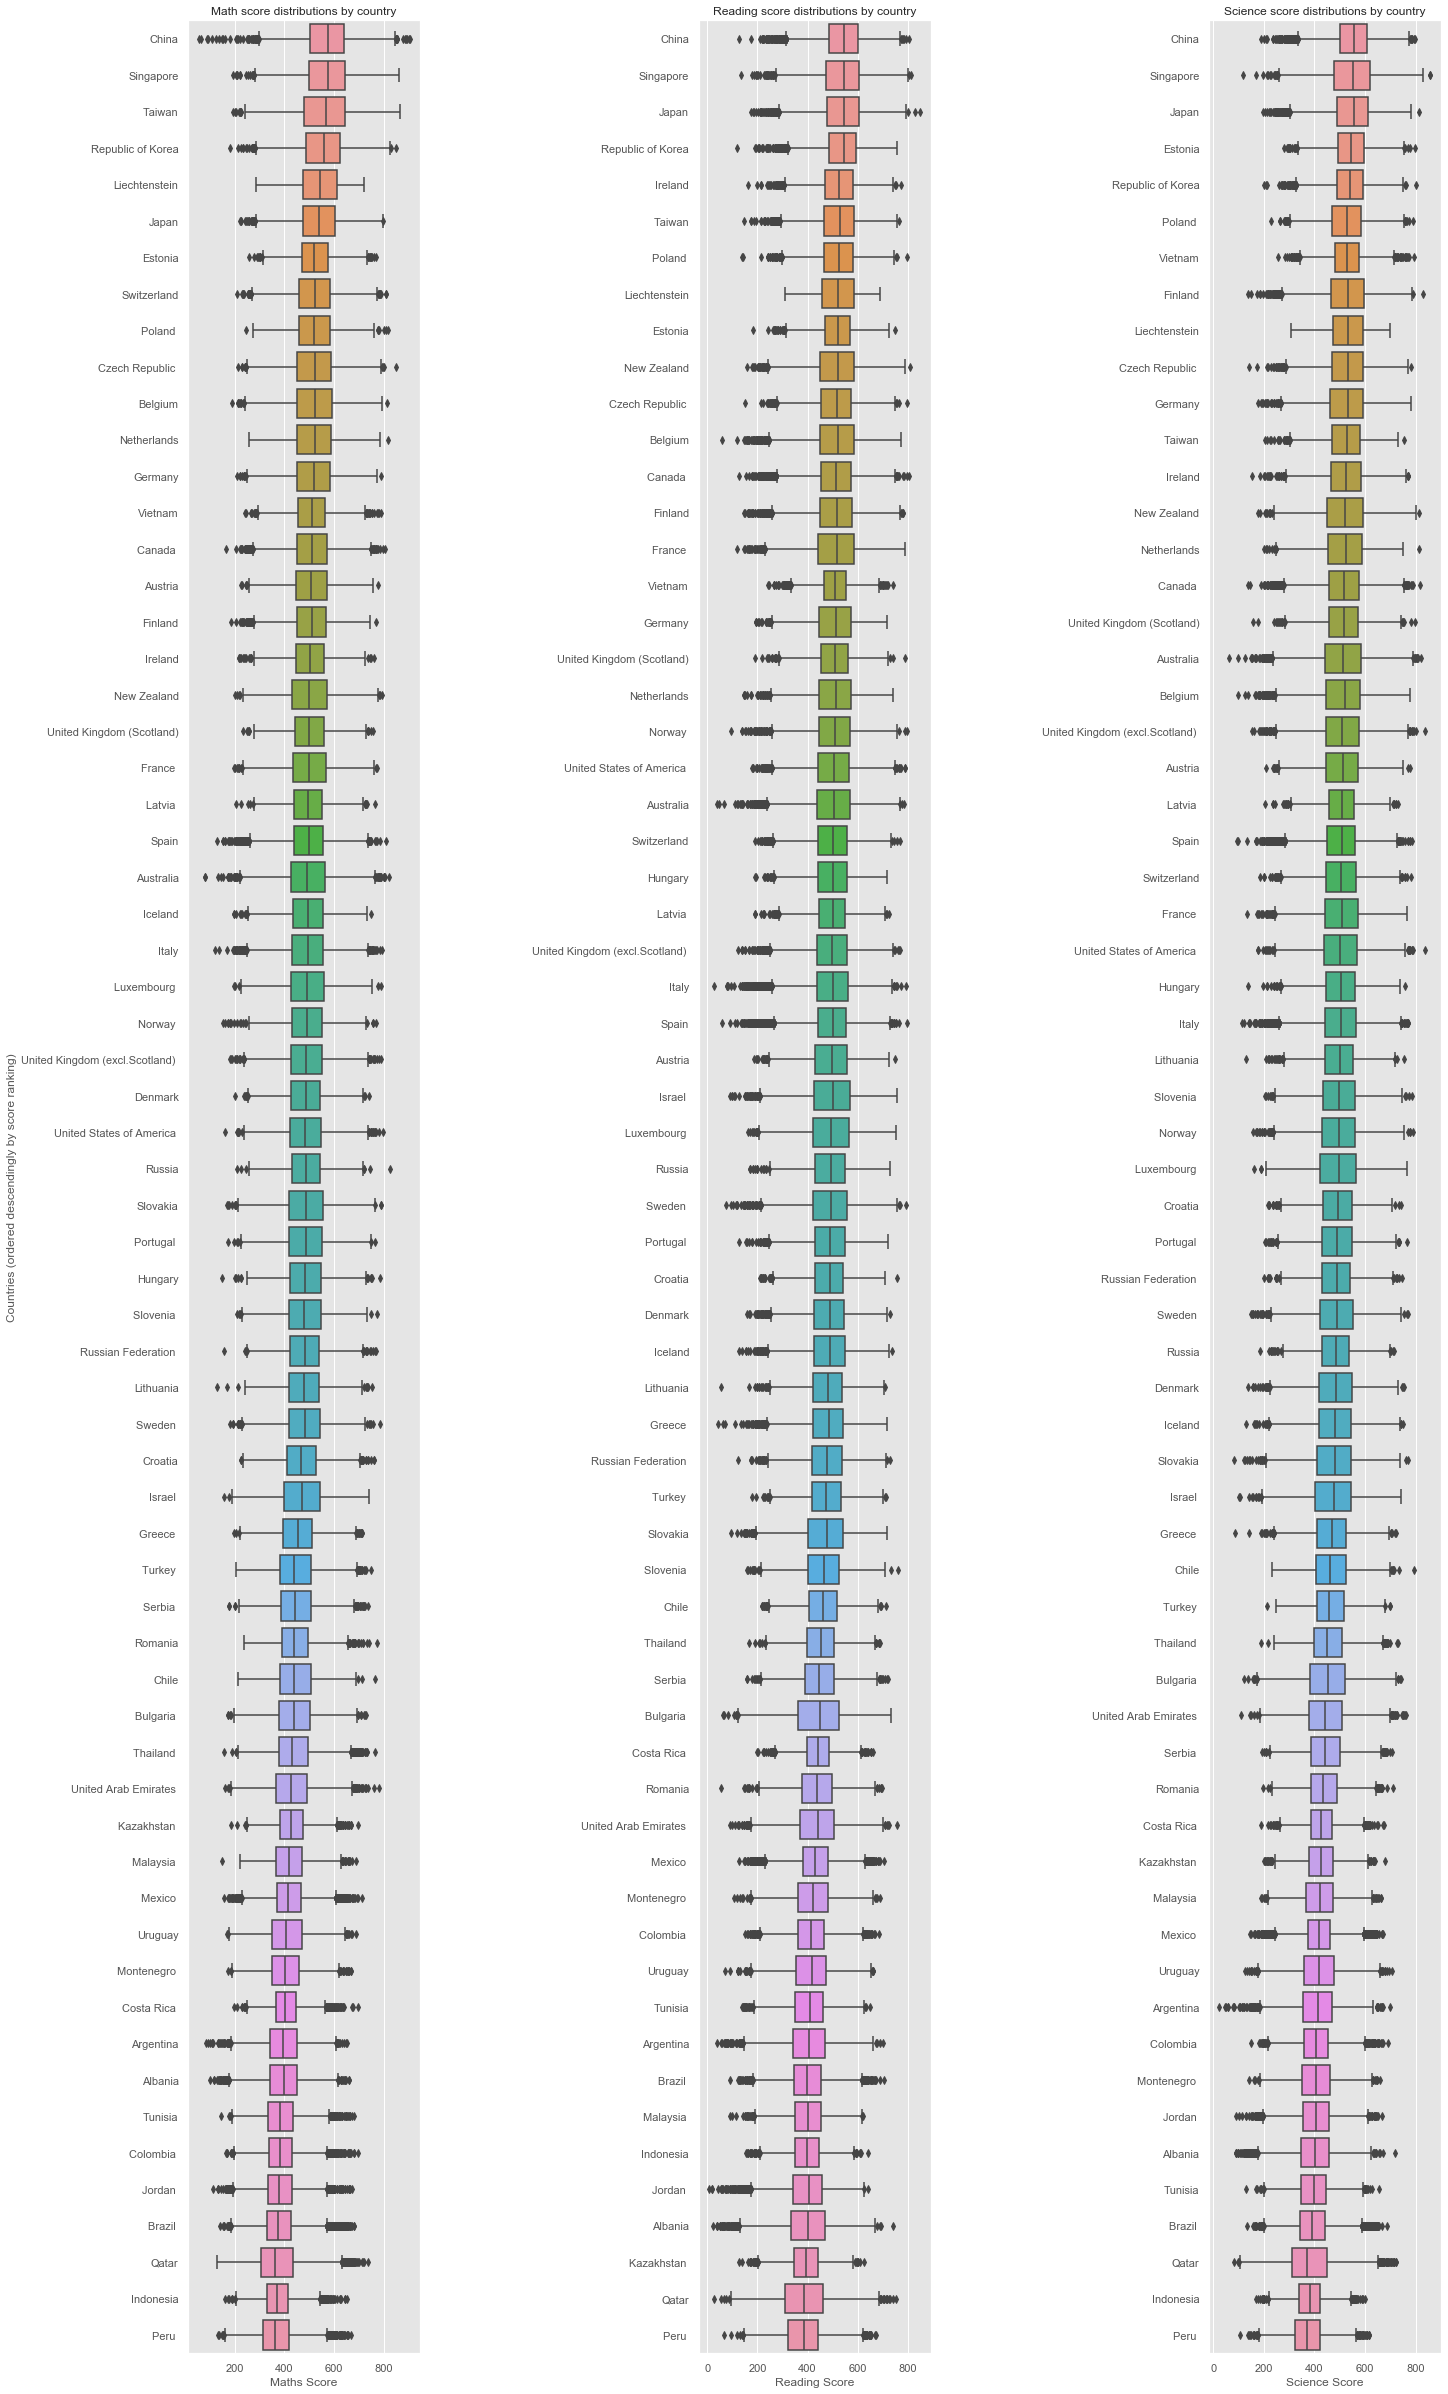

In [21]:
plt.style.use('ggplot')
sns.set_context("notebook")
plt.figure(figsize = [20, 40])
plt.subplots_adjust(wspace = 1.2) # adjust spacing between subplots, in order to show long country names nicely

plt.subplot(1, 3, 1)
sns.boxplot(x = df_student['Maths Score'], y = df_student['Country'], order = math_score_country_order);
plt.ylabel('Countries (ordered descendingly by score ranking)')
plt.title('Math score distributions by country');

plt.subplot(1, 3, 2)
sns.boxplot(x = df_student['Reading Score'], y = df_student['Country'], order = reading_score_country_order);
plt.ylabel(''); # Remove the redundant label
plt.title('Reading score distributions by country');

plt.subplot(1, 3, 3)
sns.boxplot(x = df_student['Science Score'], y = df_student['Country'], order = science_score_country_order);
plt.ylabel(''); # Remove the redundant label
plt.title('Science score distributions by country');

plt.savefig('img/scores_distribution_country.png', bbox_inches='tight')

Here we have, in decreasing order, the rankings of countries with the best-performing students, on average, for each of the three subjects. We find that:
* For every one of these three score distributions, most understudies fitted inside the interval of scores somewhere in the range of 400 and 500 points, which happens to likewise be the middle interval of the conceivable score range.


* _From the top positioning of nations, we can obviously observe that it was no coincidence that exceptional students come from Asian countries, specifically China and Singapore, as these are the nations which are first, second or third place over all subjects. Another nation which intrigued was Poland, with 3 remarkable students in Mathematics. Here, it tends to be seen this is no fortuitous event either, as Poland involves a spot in the main 10th place in Reading and Science, and eleventh in Mathematics_

***

### Gender Differences in Subjects By Country
We will see the differences in Pisa scores by gender and subject (math, reading, and science) across countries.

In [22]:
female_student = df_student.query('Gender=="Female"')
male_student = df_student.query('Gender=="Male"')

maths_score_female = female_student.groupby('Country')['Maths Score'].mean()
maths_score_male = male_student.groupby('Country')['Maths Score'].mean()

reading_score_female = female_student.groupby('Country')['Reading Score'].mean()
reading_score_male = male_student.groupby('Country')['Reading Score'].mean()

science_score_female = female_student.groupby('Country')['Science Score'].mean()
science_score_male = male_student.groupby('Country')['Science Score'].mean()

In [23]:
maths_score_diff_per = (((maths_score_female - maths_score_male)/maths_score_male)*100).sort_values(ascending = False)
reading_score_diff_per = (((reading_score_female - reading_score_male)/reading_score_male)*100).sort_values(ascending = False)
science_score_diff_per = (((science_score_female - science_score_male)/science_score_male)*100).sort_values(ascending = False)

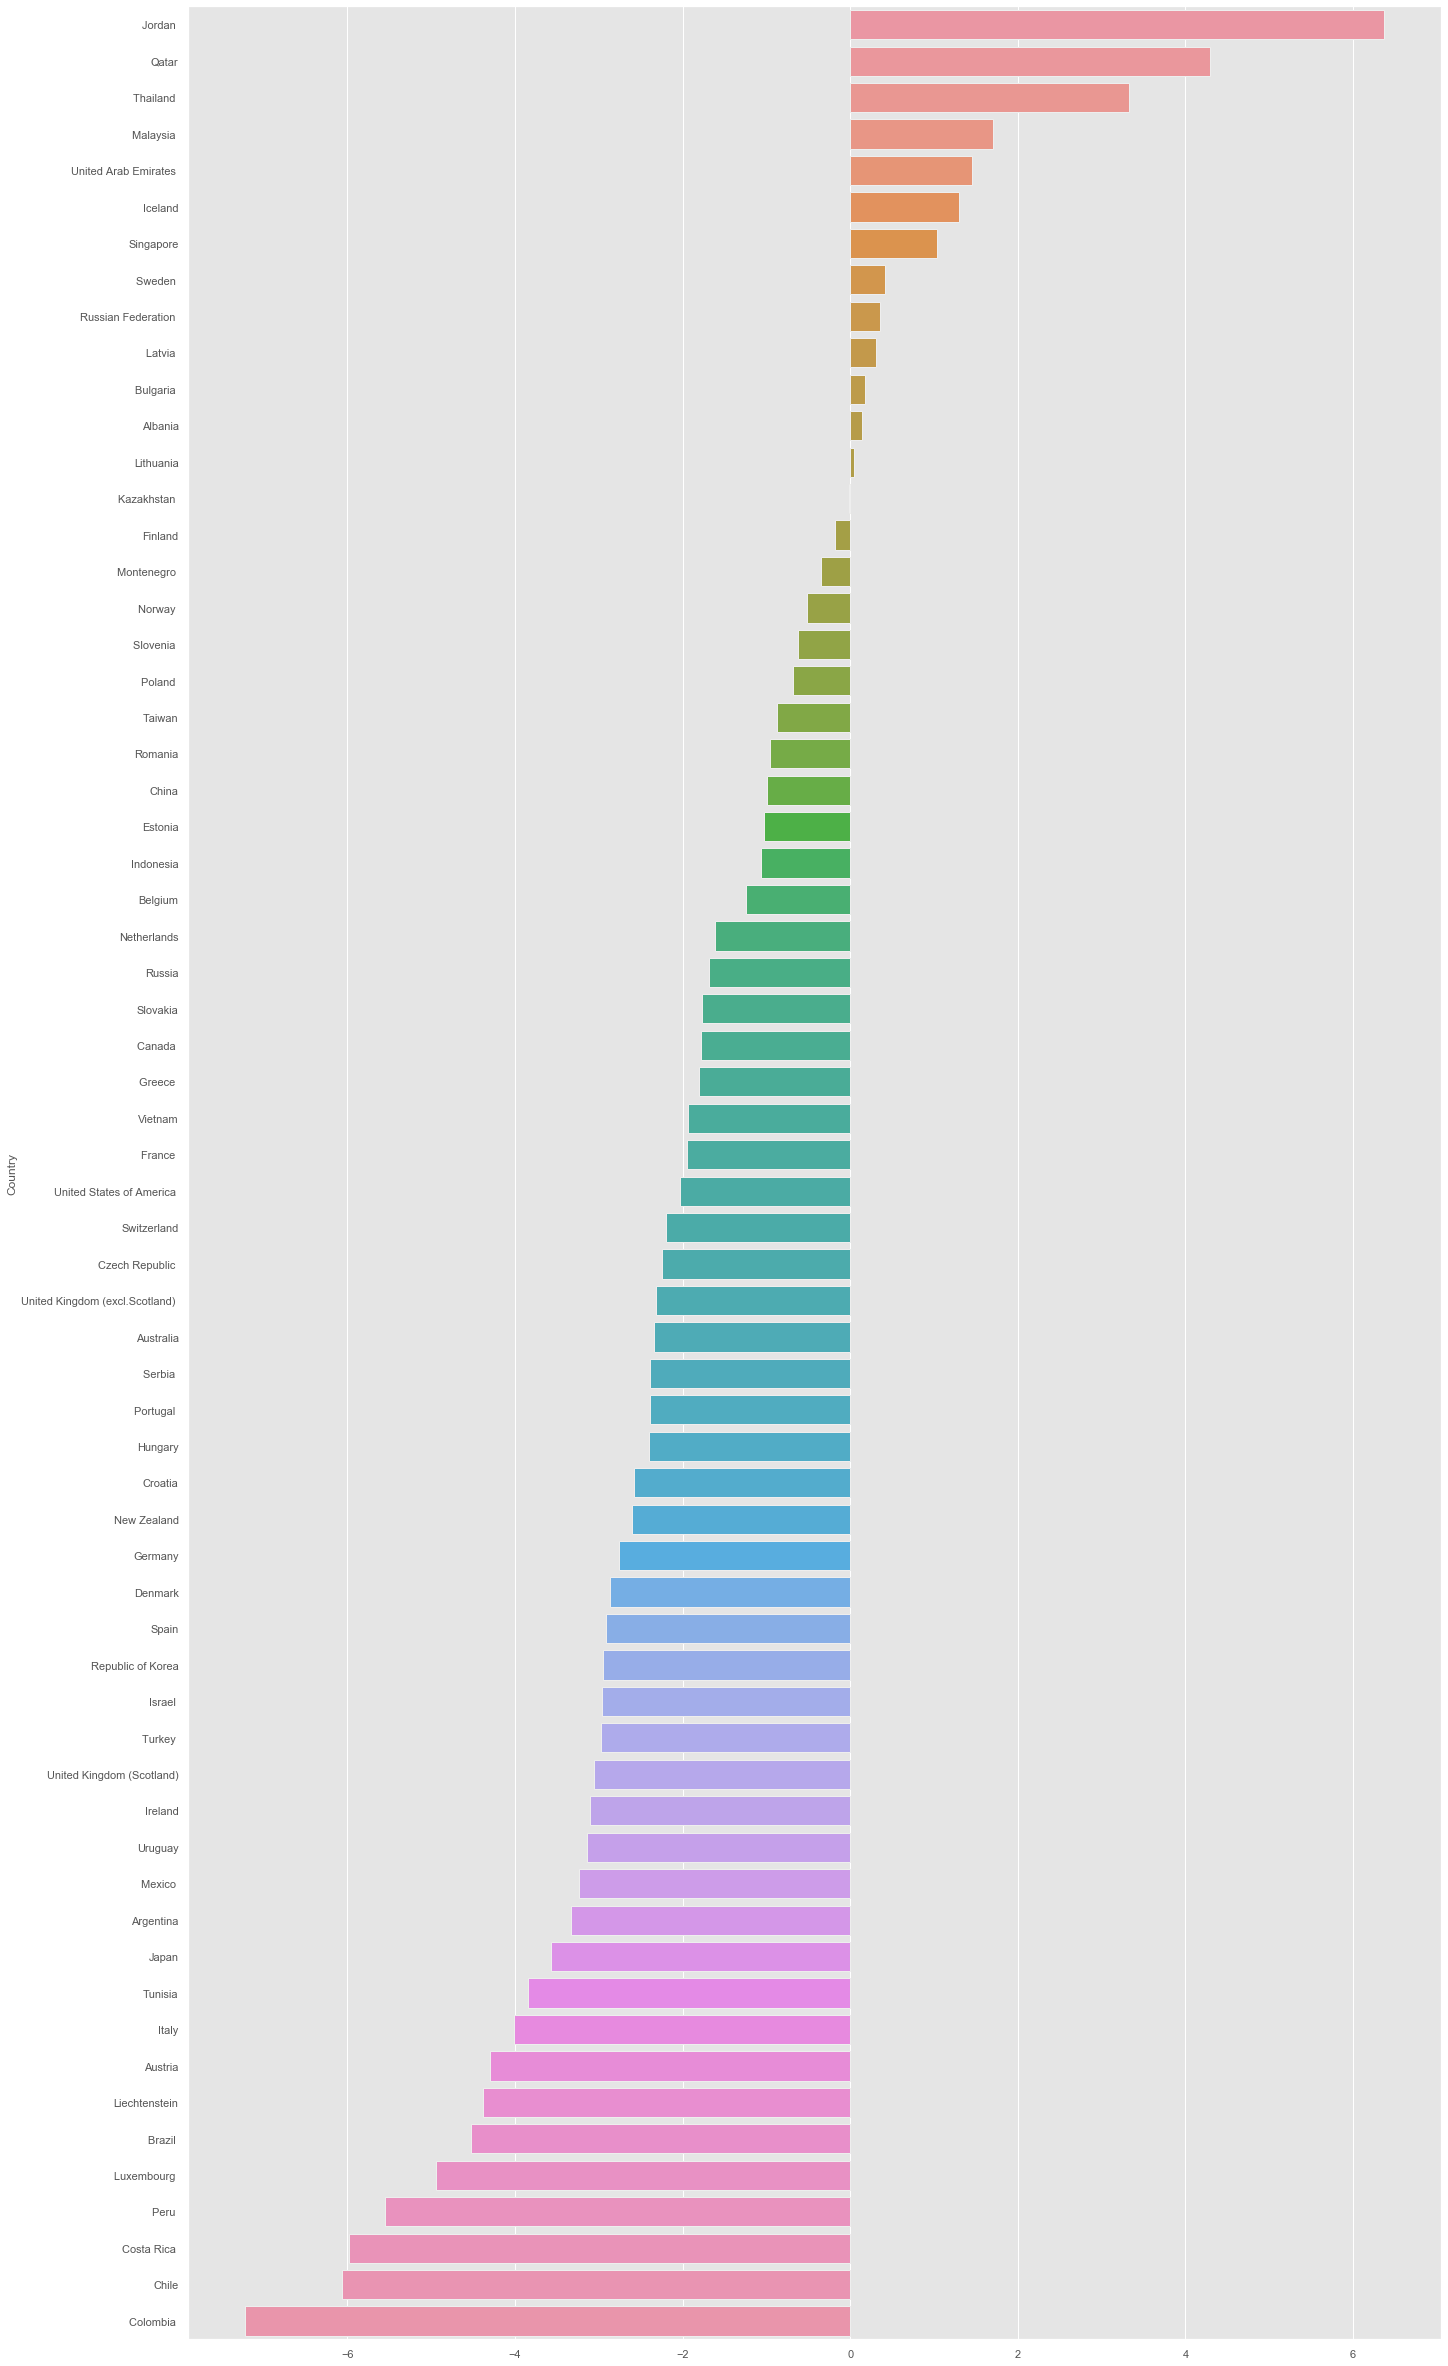

In [24]:
plt.figure(figsize=[20,40])
#sns.set_context("poster")
sns.barplot(maths_score_diff_per.values, maths_score_diff_per.index)
plt.savefig('img/maths_diff_percentile.png', bbox_inches='tight')

__Math__

- These plots represent the % difference in scores using males as reference. A positive difference means females scored higher, while a negative difference means females scored lower. The blue line represents the mean difference across all countries.

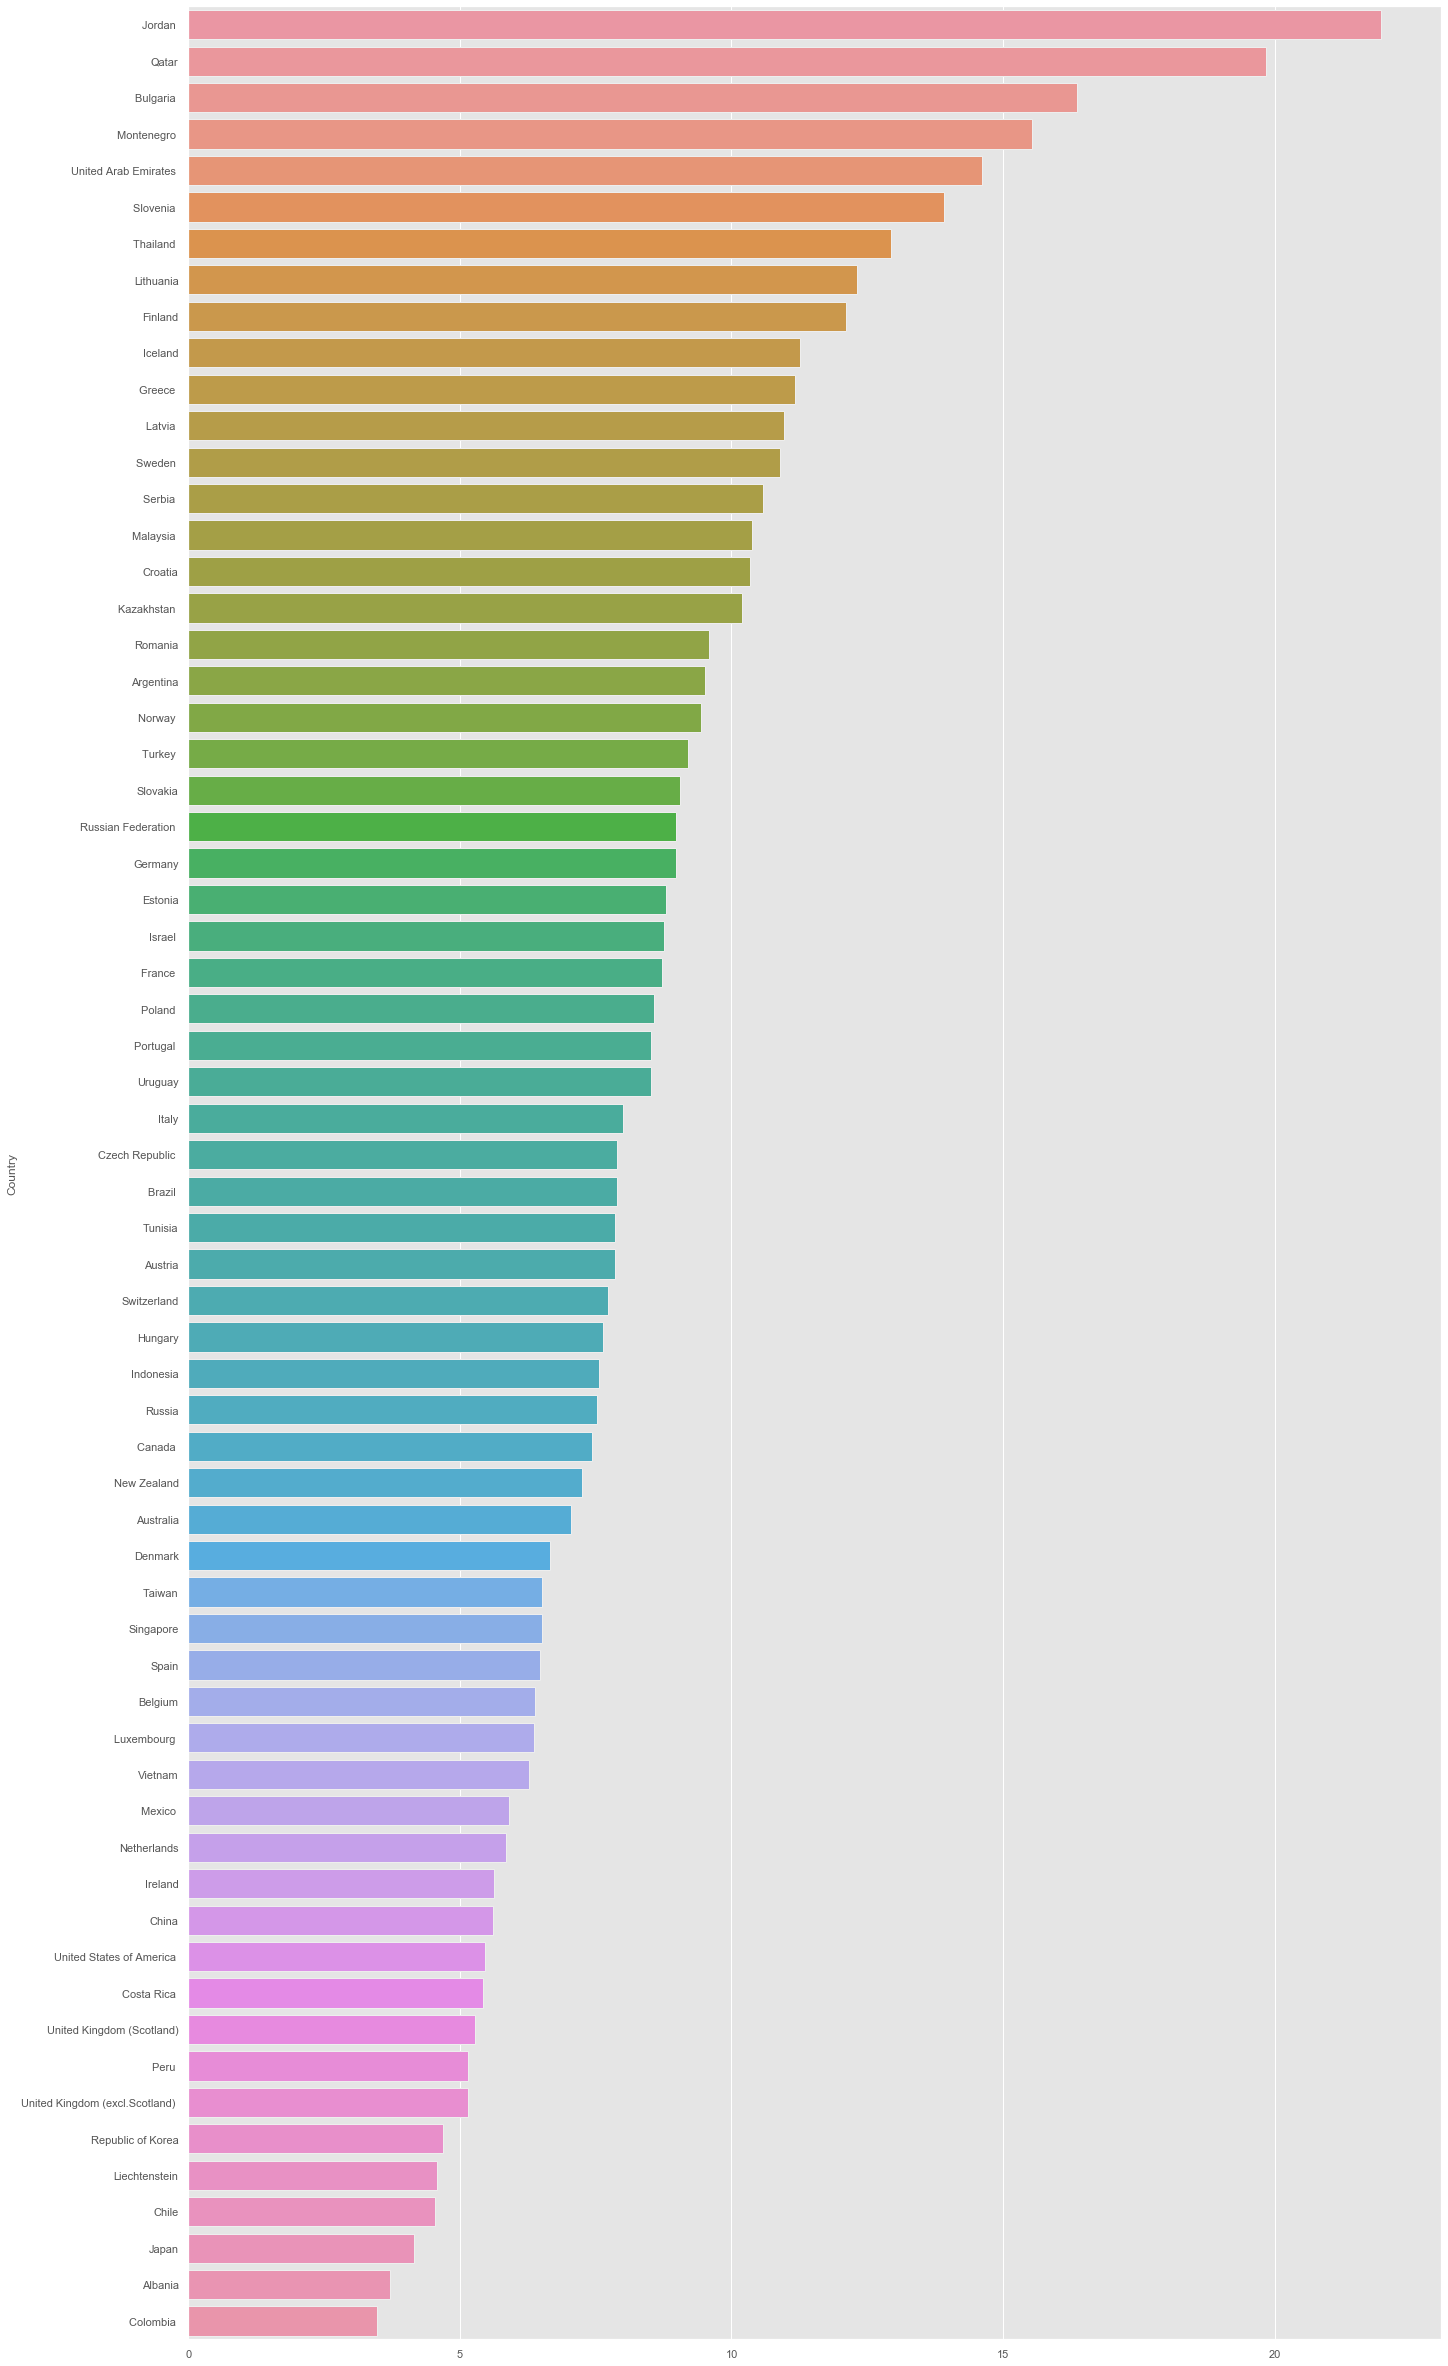

In [25]:
plt.figure(figsize=[20,40])
#sns.set_context("poster")
sns.barplot(reading_score_diff_per.values, reading_score_diff_per.index)
plt.savefig('img/reading_diff_percentile.png', bbox_inches='tight')

___It looks like females are just better at reading! Females had higher reading across all countries!___

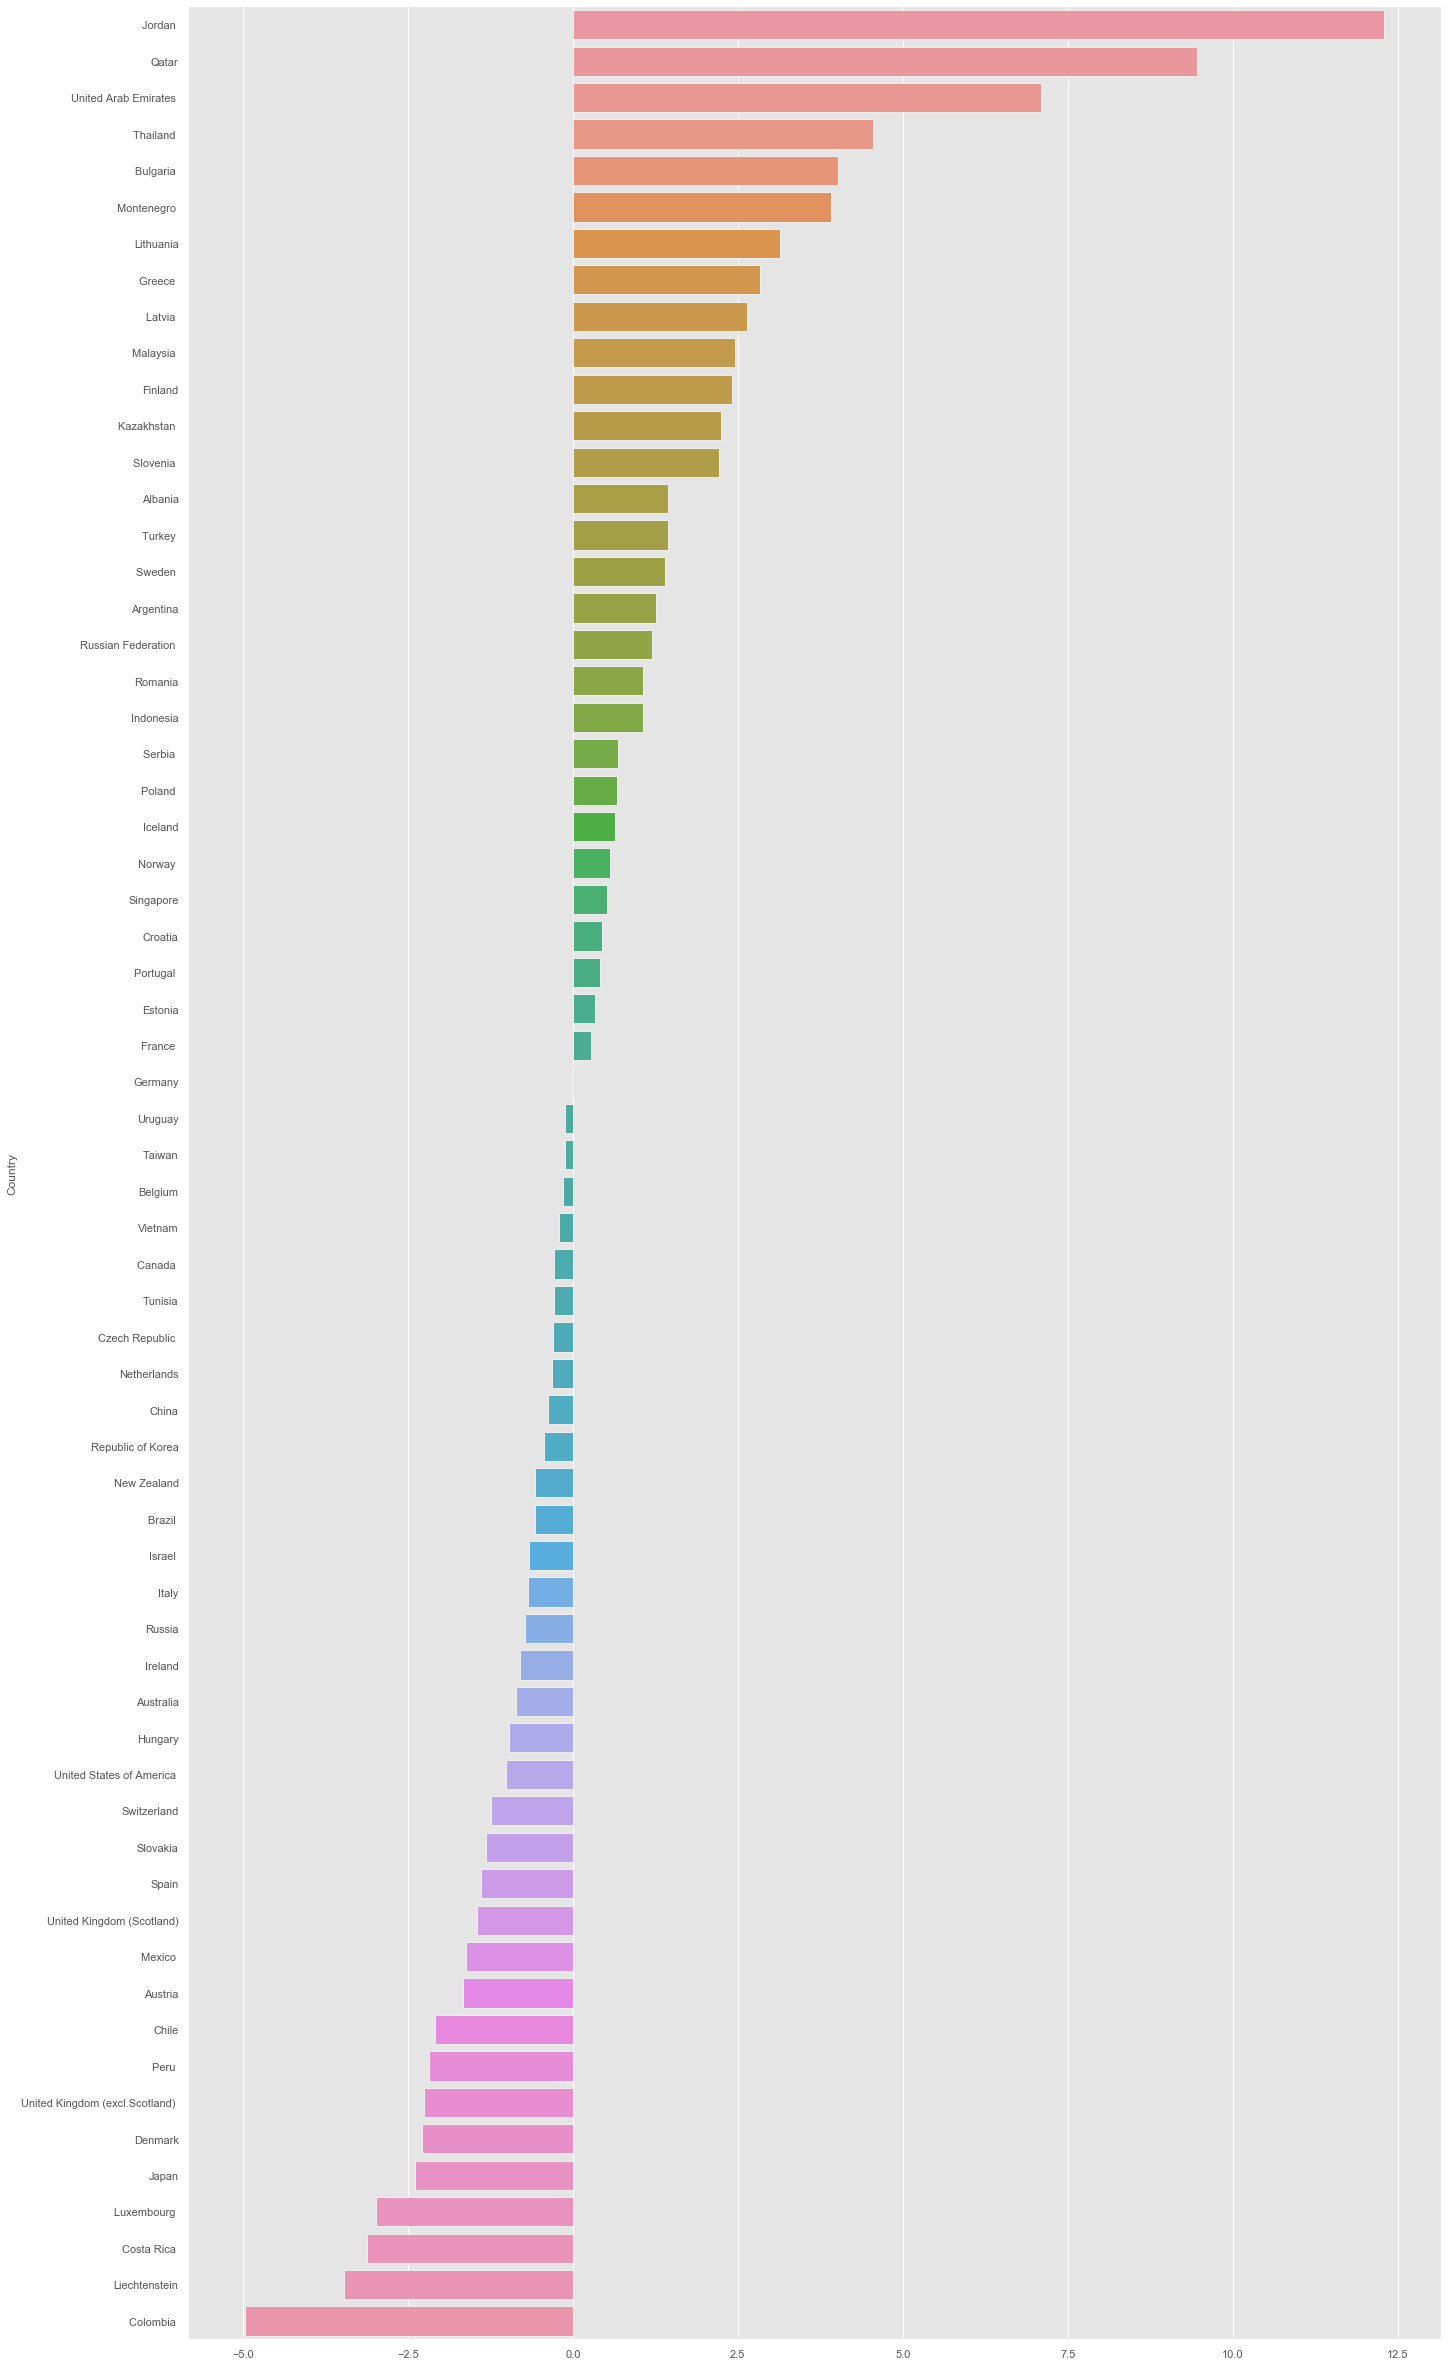

In [26]:
plt.figure(figsize=[20,40])
#sns.set_context("poster")
sns.barplot(science_score_diff_per.values, science_score_diff_per.index)
plt.savefig('img/science_diff_percentile.png', bbox_inches='tight')

___It seems as if science shows similar trends to maths.___

---

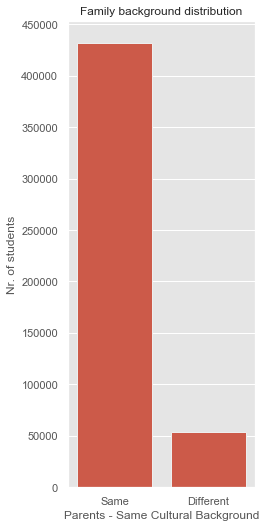

In [27]:
plt.figure(figsize=[3, 8]);
#sns.set_context("notebook")

sns.countplot(x = 'Parents - Same Cultural Background', data = df_student, color = sns.color_palette()[0]);

y_ticks = np.arange(0, 450000 + 1, 50000)
plt.yticks(y_ticks, y_ticks);
plt.ylabel("Nr. of students");
plt.title('Family background distribution');

plt.savefig('img/family_back.png', bbox_inches='tight')

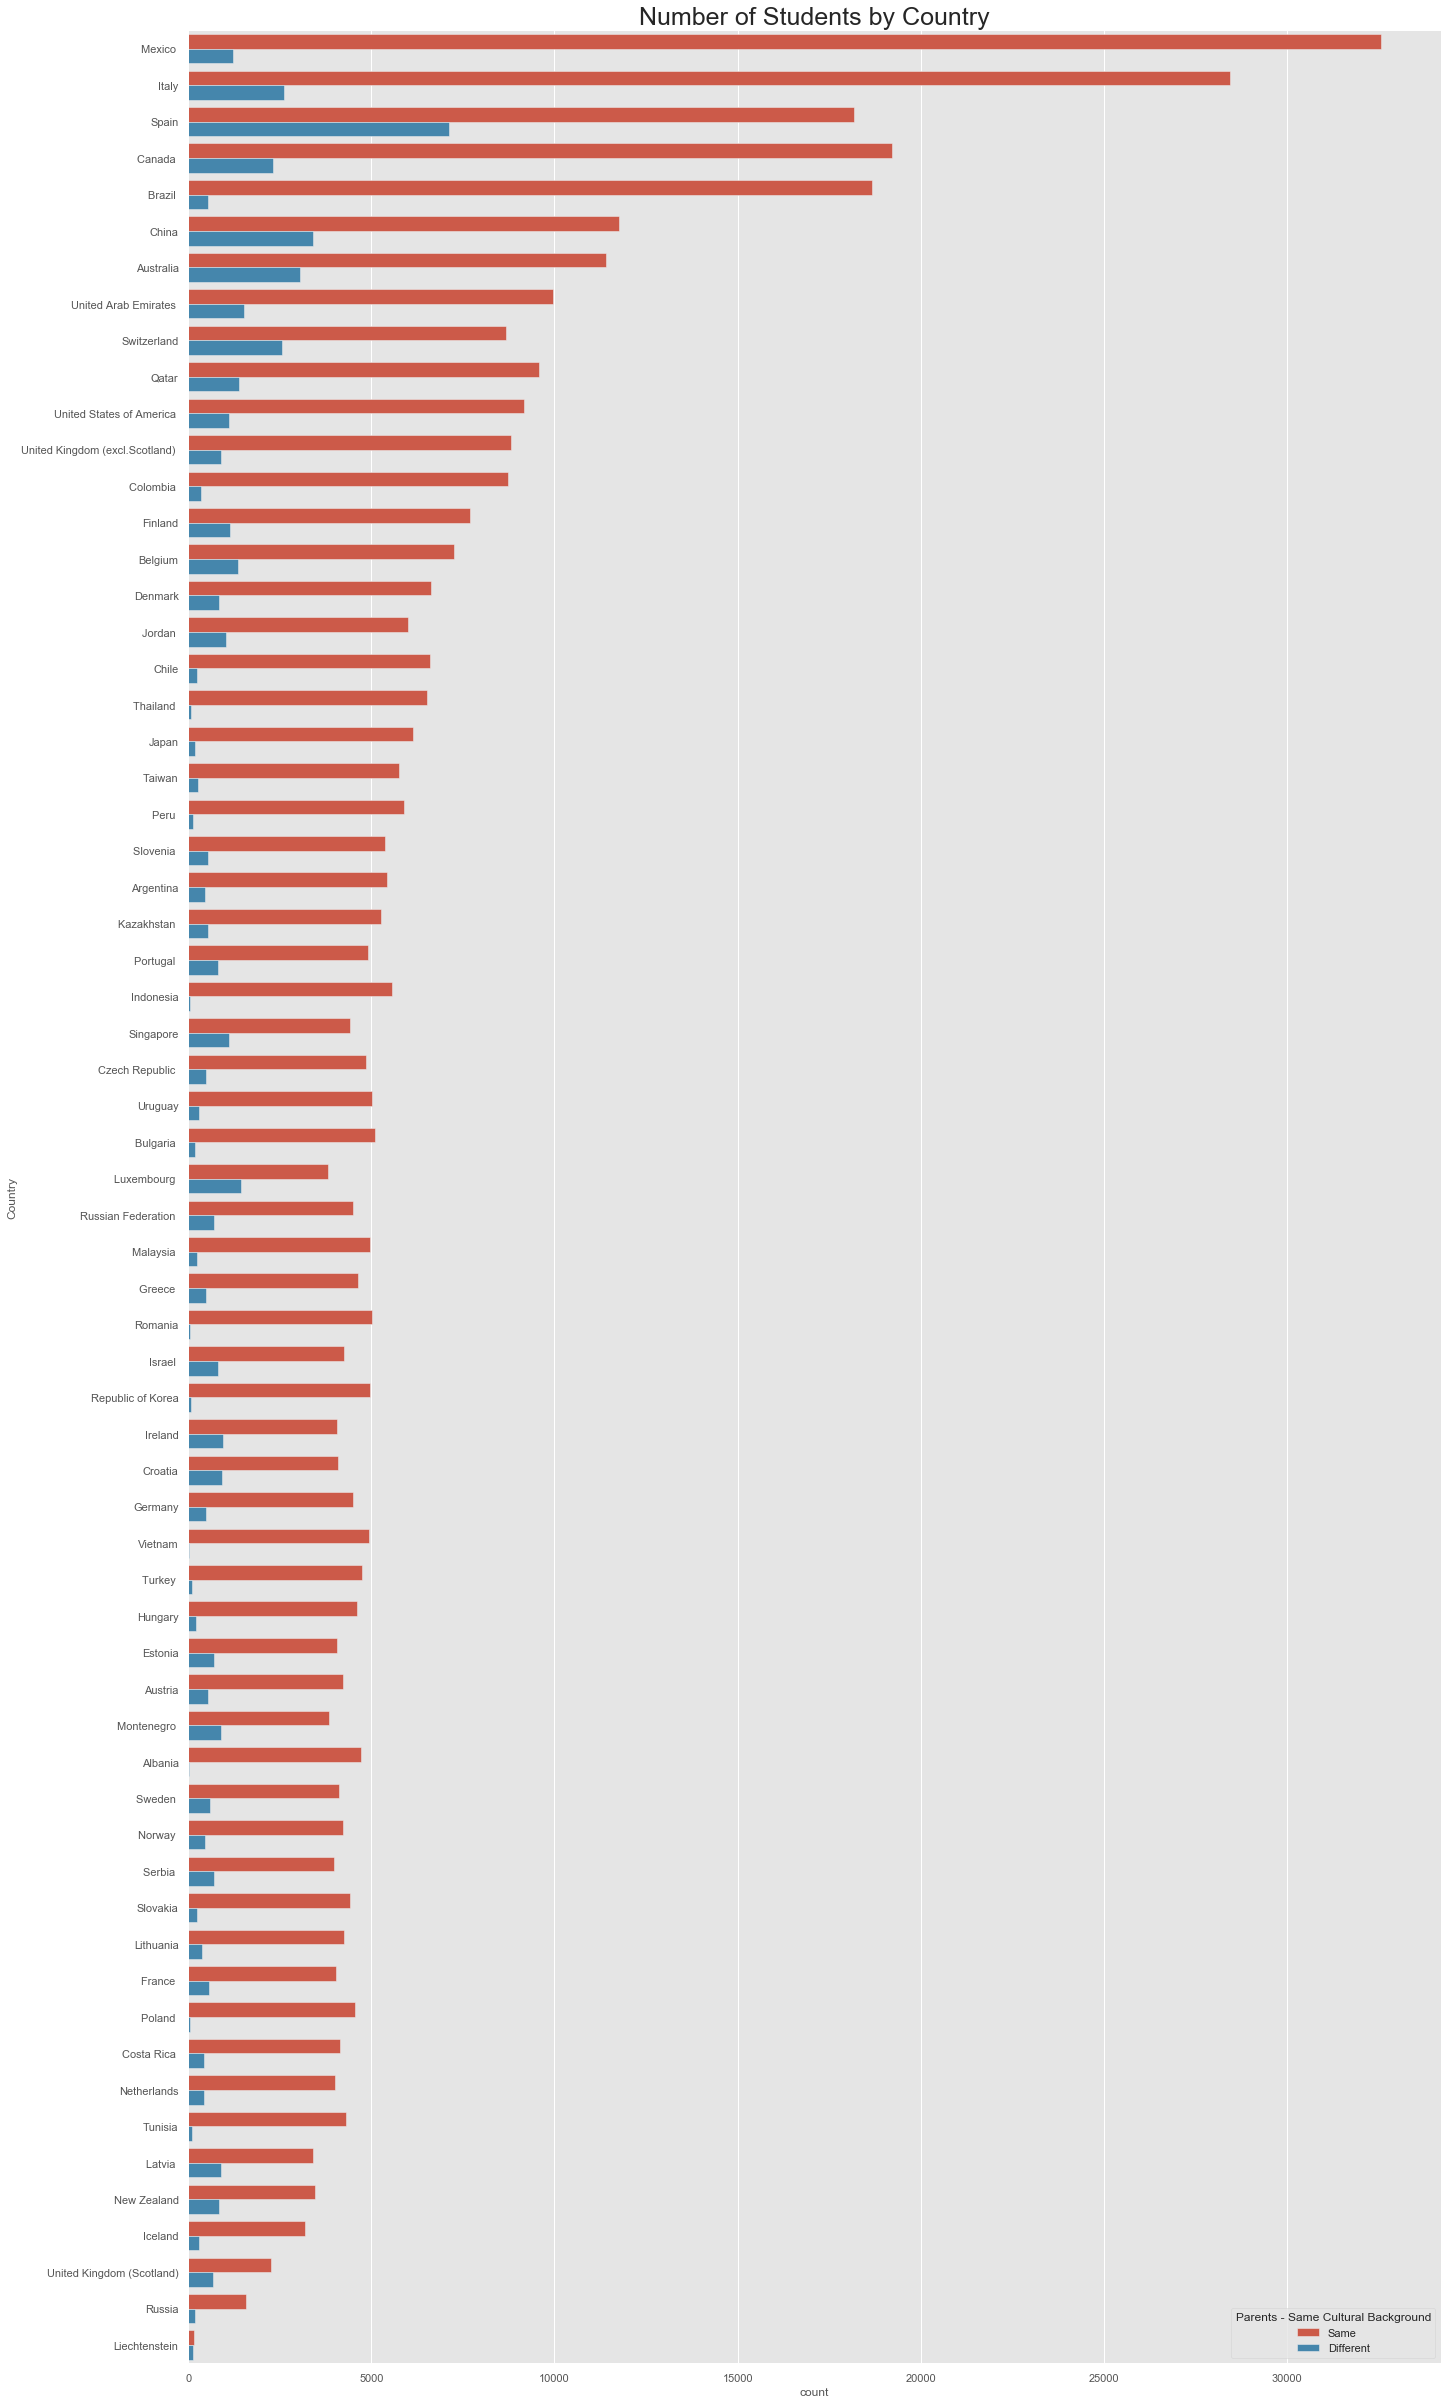

In [28]:
plt.style.use('ggplot')
#sns.set_context("poster")

order= df_student['Country'].value_counts().index

plt.figure(figsize=[20,40])
sns.countplot(data=df_student, y='Country', order=order, hue='Parents - Same Cultural Background')
plt.title('Number of Students by Country',size=25);

plt.savefig('img/family_back_dist.png', bbox_inches='tight')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


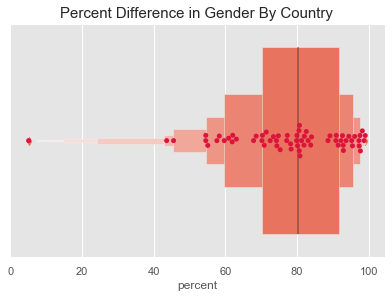

In [29]:
same_cul_student = df_student[df_student['Parents - Same Cultural Background']=="Same"].groupby('Country').size()
diff_cul_student = df_student[df_student['Parents - Same Cultural Background']=="Different"].groupby('Country').size()

same_percent=100*(same_cul_student.values/df_gender['total_population'])
diff_percent=100*(diff_cul_student.values/df_gender['total_population'])
abs_percent=(np.absolute((same_percent-diff_percent)))

sns.swarmplot(x=abs_percent, color='crimson')
sns.boxenplot(x=abs_percent, color ='tomato')
plt.title('Percent Difference in Gender By Country', size = 15)
plt.xlabel('percent');

___While almost all the countries shows very high number of parents coming from same cultural background.___
- There are some countries like 'Poland', 'Indonesia', 'Vietnam' and 'Turkey' which has almost all the parents have same cultural background(which is more than 95%).
- Almost half of the countries have parents with same cultural background of about 70%. It even looks like only one country have a different cultural background of less than 10%. We have this example as 'Liechtenstein'.

### Parents from Same Cultural (Country) Backgrounds Vs Different Cultural (Country) Backgrounds

After finding out previously the gender percentile distribution for each literacy category, we are interested to look into the relationship how the country of residence/education affects scores on each of the subjects individually.

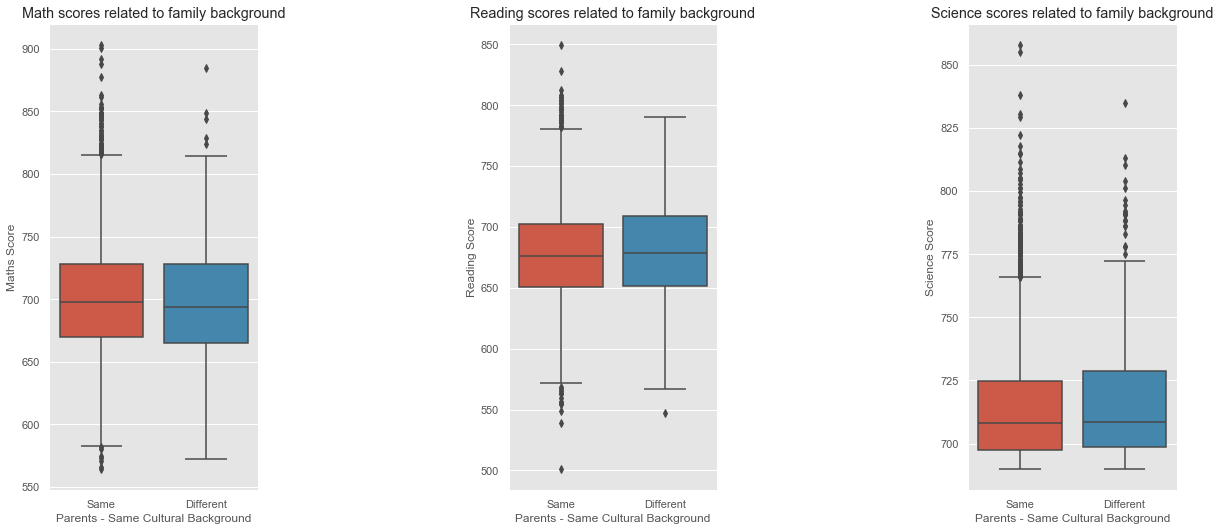

In [30]:
plt.figure(figsize = [18, 8])
#sns.set_context("notebook")
plt.subplots_adjust(wspace = 1.2)

plt.subplot(1, 3, 1)
sns.boxplot(x = df['Parents - Same Cultural Background'], y = df['Maths Score'])
plt.title('Math scores related to family background');

plt.subplot(1, 3, 2)
sns.boxplot(x = df['Parents - Same Cultural Background'], y = df['Reading Score'])
plt.title('Reading scores related to family background');

plt.subplot(1, 3, 3)
sns.boxplot(x = df['Parents - Same Cultural Background'], y = df['Science Score']);
plt.title('Science scores related to family background');

plt.savefig('img/family_back_boxplot.png', bbox_inches='tight')

It tends to be seen that, on average, students originating from heterogenic family foundations report expanded performance in all areas, contrasted with understudies from homogenous family foundations.

### Parent’s Occupation

One of the variables the dataset addressed was the occupation of each of the parents. There were five possible categories: “Full-Time”, “Part-Time”, “Not working, but looking for a job”, “Other (e.g. home duties, retired)”, and no response. 

So, we would like to see the how the individual parent occupation effects student's performance.

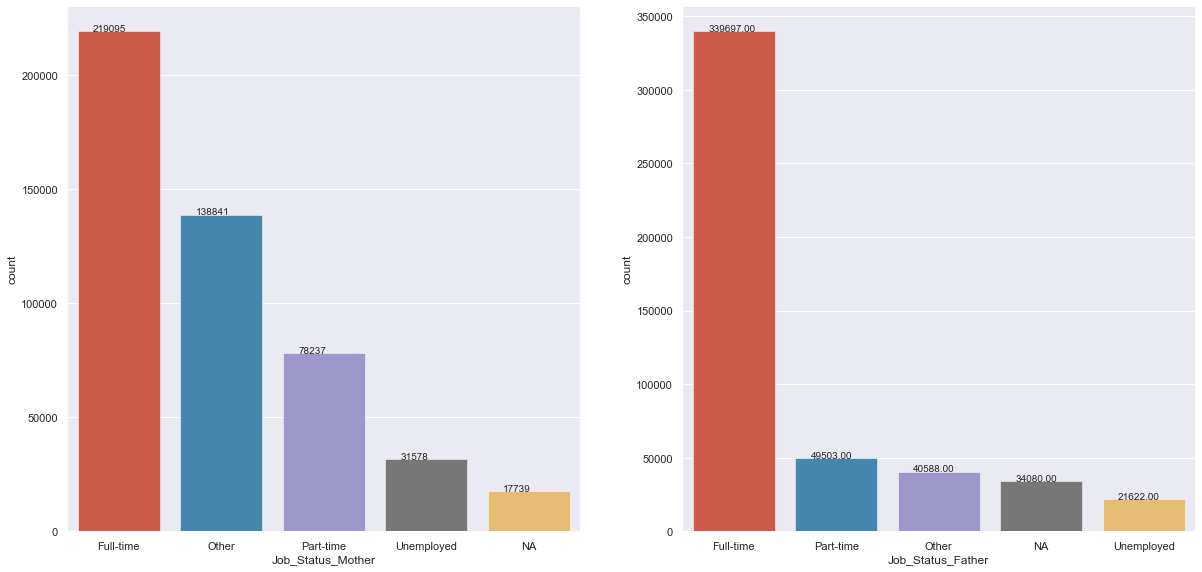

In [31]:
plt.style.use('ggplot')
sns.set_style("darkgrid")

plt.figure(figsize = [18, 9])
#sns.set_context("notebook")

plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'Job_Status_Mother', data = df_student,
             order = df_student['Job_Status_Mother'].value_counts().index);
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

plt.subplot(1, 2, 2)
ax = sns.countplot(x = 'Job_Status_Father', data = df_student,
             order = df_student['Job_Status_Father'].value_counts().index);
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    
plt.savefig('img/parent_job_dist.png', bbox_inches='tight')

From the above distributions, we find out that:

- ___The distribution of the number of parents who selected each of the categories can be seen in the bar chart.___ 


- ___The chart shows that father’s primarily have full-time jobs.___ 


- ___However, there are large numbers of mothers who work full-time, part-time, or are stay-at-home moms, with women making up a larger portion of the work-force.___

### Pair-By-Pair Relationship Between Different Subjects

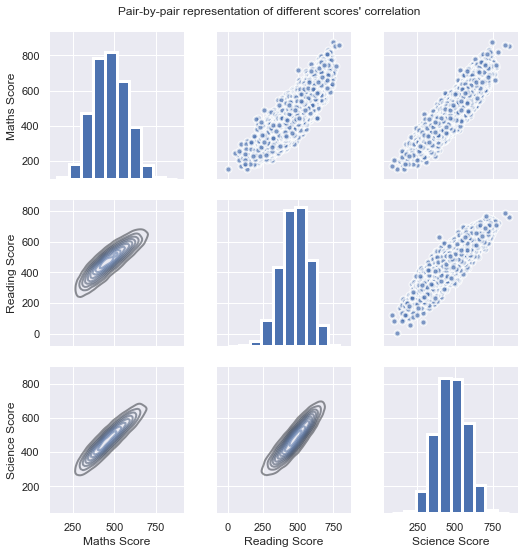

In [32]:
plt.style.use('seaborn-deep')
sns.set_style("darkgrid")
#sns.set_context("notebook")

grid = sns.PairGrid(data = df_student.sample(20000), vars=["Maths Score", "Reading Score", "Science Score"])
grid = grid.map_diag(plt.hist, linewidth=3)
grid = grid.map_lower(sns.kdeplot, linewidths = 2, edgecolor = 'blue', alpha =.5)
grid = grid.map_upper(plt.scatter, linewidths = 2, edgecolor = 'white',alpha =.7)
grid.fig.suptitle("Pair-by-pair representation of different scores' correlation", y = 1.02);

plt.savefig('img/pair_subject_score.png')

___As it could be normal, there is a solid and positive correlation between any pair of the three factors representing to the scores of the three subjects. Along these lines, the previous relationships between scores saw in the behavior of numerous nations' countries is justified.___

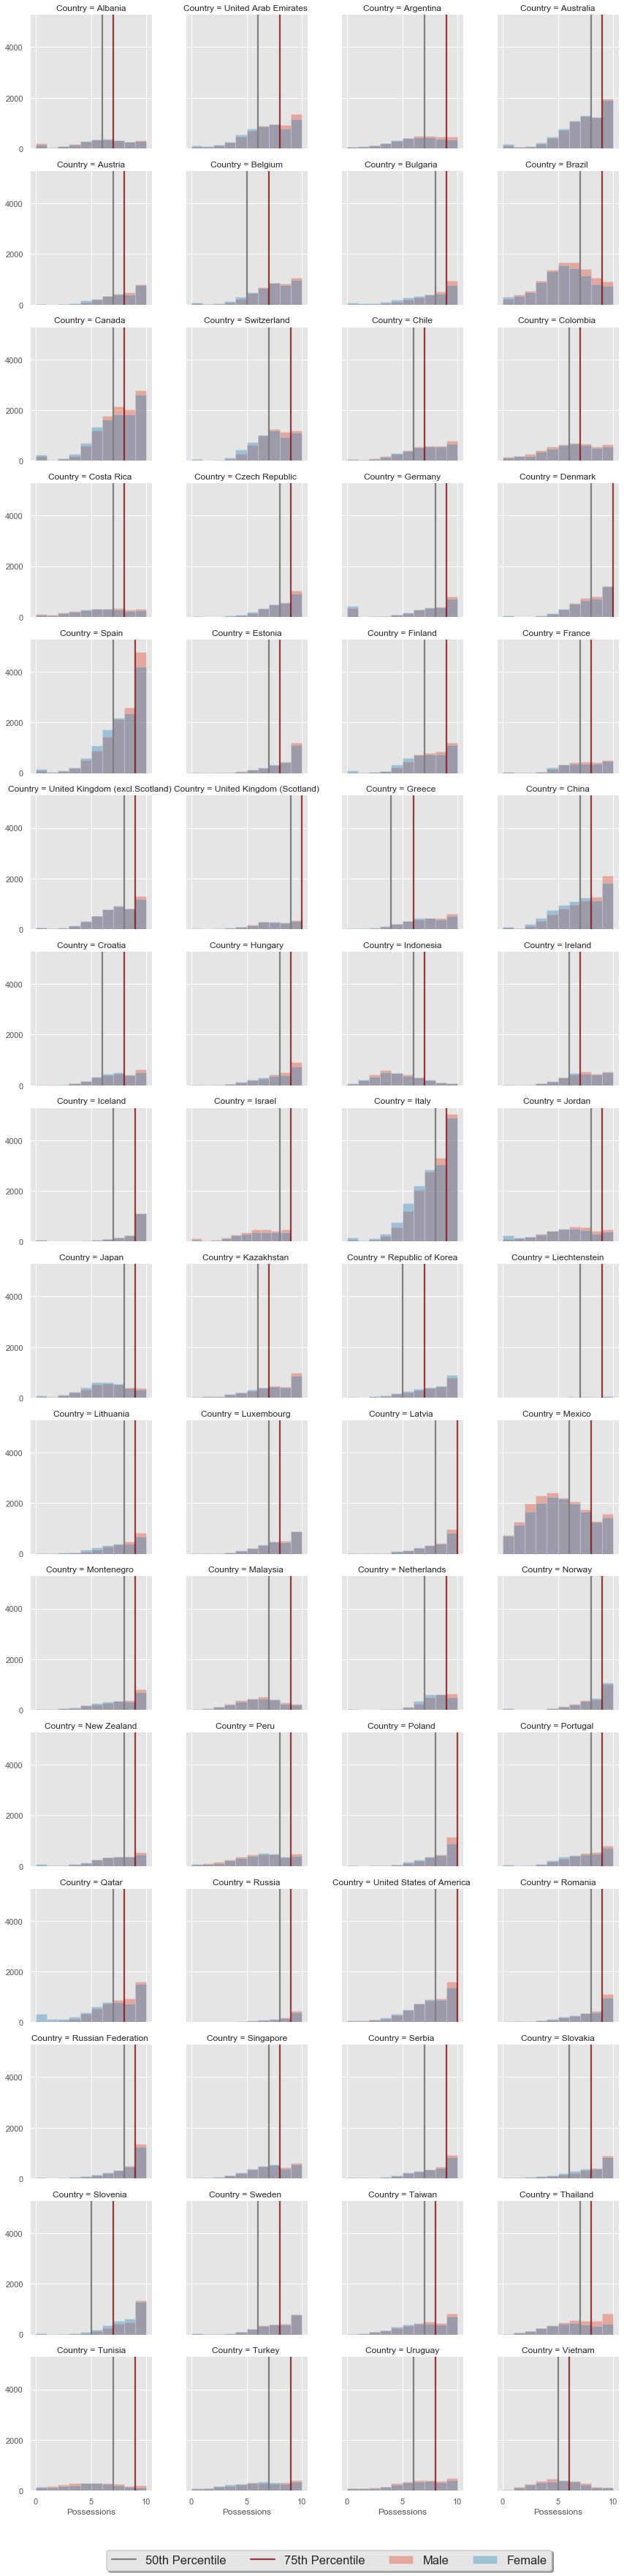

In [33]:
plt.style.use('ggplot')
#sns.set_style("darkgrid")

grid =sns.FacetGrid(data=df_student, col='Country', hue='Gender', col_wrap=4)
grid.map(plt.hist, 'Possessions', alpha=0.4)
sns.set_context("talk")

for ax, c in zip(grid.axes.flat, country):
    ax.axvline(x=df_student.query('Country==@c').Possessions.quantile(.5), color='grey')
    ax.axvline(x=df_student.query('Country==@c').Possessions.quantile(.75), color='maroon', alpha=.75)
    
plt.legend(['50th Percentile','75th Percentile','Male', 'Female'], bbox_to_anchor=(0.5, -0.4),
          fancybox=True, shadow=True, ncol=4)

- **Due to the fact that most countries do not have an even 50/50 split among gender, I wanted to depict the Possessions by density.**

- **The grey vertical lines shown above shows the 50 percentile motivation score for each country meanwhile the maroon lines depict the 75 percentile. Notice that almost all countries show the male students and female students are same  in terms od Possessions.**

- **All of the countries show that the male proportion scored the most compared to the females in terms of possessions.**

___